In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

DATA_FILE_PATH = 'datasets/Life_Expectancy_Data.csv'

data_raw = pd.read_csv(filepath_or_buffer=DATA_FILE_PATH)
data_raw = data_raw.dropna()
data_raw.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
def standarized(x, columns):
    """Standarize column values"""
    x_std = x.copy(deep=True)
    for column in columns:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 

to_standarize = ['Schooling', 'Life expectancy ','Income composition of resources']
data_std = standarized(data_raw,to_standarize)
data_std.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,-0.489074,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,-0.833209,-0.722580
1,Afghanistan,2014,Developing,-1.068828,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,-0.849595,-0.758353
2,Afghanistan,2013,Developing,-1.068828,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,-0.882366,-0.794126
3,Afghanistan,2012,Developing,-1.114299,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,-0.920599,-0.829900
4,Afghanistan,2011,Developing,-1.148402,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,-0.969755,-0.937219


In [4]:
import time
from functools import wraps
def beautify_snake_case(string):
    return ' '.join([s.capitalize() for s in string.split('_')])

def timer(func):
    def wrapper(*args, **kwargs):
        repeat = 10
        start = time.time()
        result = None
        for _ in range(repeat):
            result = func(*args,**kwargs)
        end = time.time()
        avg_time = (end - start) / repeat
        avg_time_per_epoch = avg_time / kwargs['epochs']

        print(f'\n{beautify_snake_case(func.__name__)}\n'
            f'Average execution in: {avg_time:.2E}\n'
            f'Time per epoch: {avg_time_per_epoch:.2E}')

        return result
    return wrapper

In [5]:
def gradient_descent_batch(x , y, epochs, learning_rate = 10**-8):
    observations = x.shape[1]
    variables = x.shape[0]

    theta = np.ones([variables, 1])
    delta = 1
    costs = []
    for _ in range(epochs):
        diff = theta.T.dot(x) - y
        grad = x.dot(diff.T) 
        theta -= observations * learning_rate * grad

        cost = (diff**2).sum() / observations
        delta = len(costs) > 0 and costs[-1] - cost
        if delta < 0:
            learning_rate /= 10

        costs.append(cost)
    return theta, costs

In [6]:
def sample(population, size):
    for i in range(math.ceil(len(population[0])/size)):
        yield np.array([p[i * size:(i + 1) * size] for p in population])


def gradient_descent_mini_batch(x , y, epochs, batch_size = 64, learning_rate = 10**-6):
    variables = x.shape[0]
    observations = x.shape[1]
    theta = np.ones([variables, 1])
    costs = []
    for _ in range(epochs):
        for sx, sy in zip(sample(x, size=batch_size), sample(y, size=batch_size)):
            diff = theta.T.dot(sx) - sy
            grad = sx.dot(diff.T)
            theta -= batch_size * learning_rate * grad

            cost = (diff**2).sum() / batch_size
            costs.append(cost)
    return theta, costs

In [7]:
def gradient_descent_stochastic(x, y, learning_rate, *args, **kwargs):
    return gradient_descent_mini_batch(
                x, y, learning_rate=learning_rate, batch_size=1, *args, **kwargs)

In [8]:
def to_x_data_array(data, *labels):
    n = len(data)
    x0 = np.ones([1,n])
    xn = np.array([
        data.head(data_size)[label].values 
        for label in labels
    ])
    return np.concatenate((x0, xn), axis = 0)


final cost: 1.15E+02
final cost: 3.72E+01
final cost: 3.80E+01
final cost: 6.67E+01
final cost: 4.41E+00
final cost: 1.94E+02


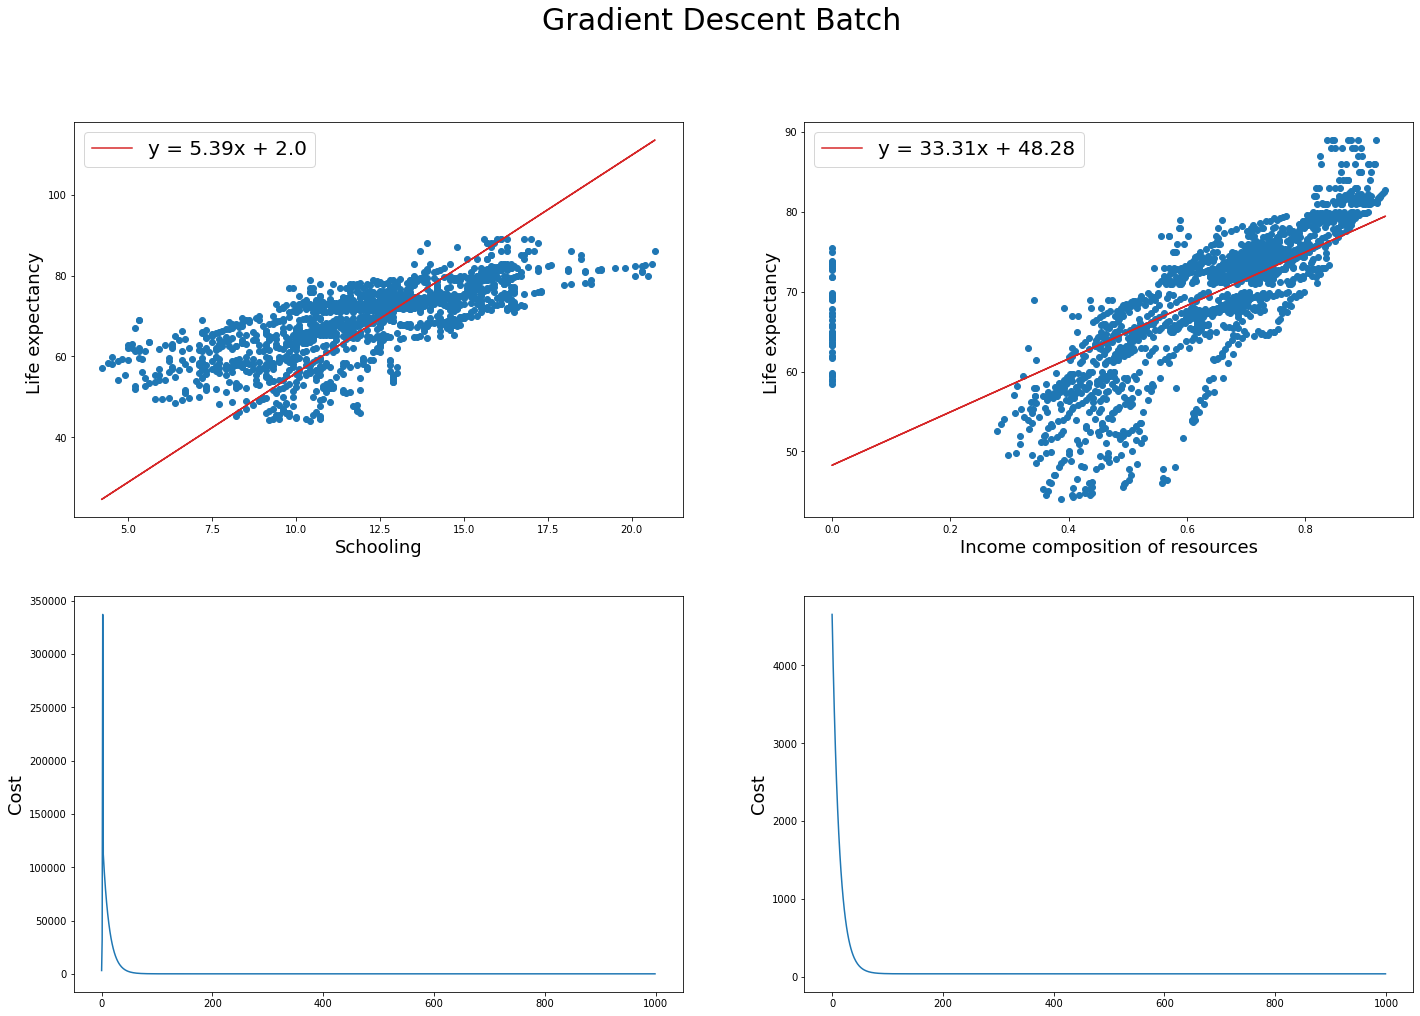

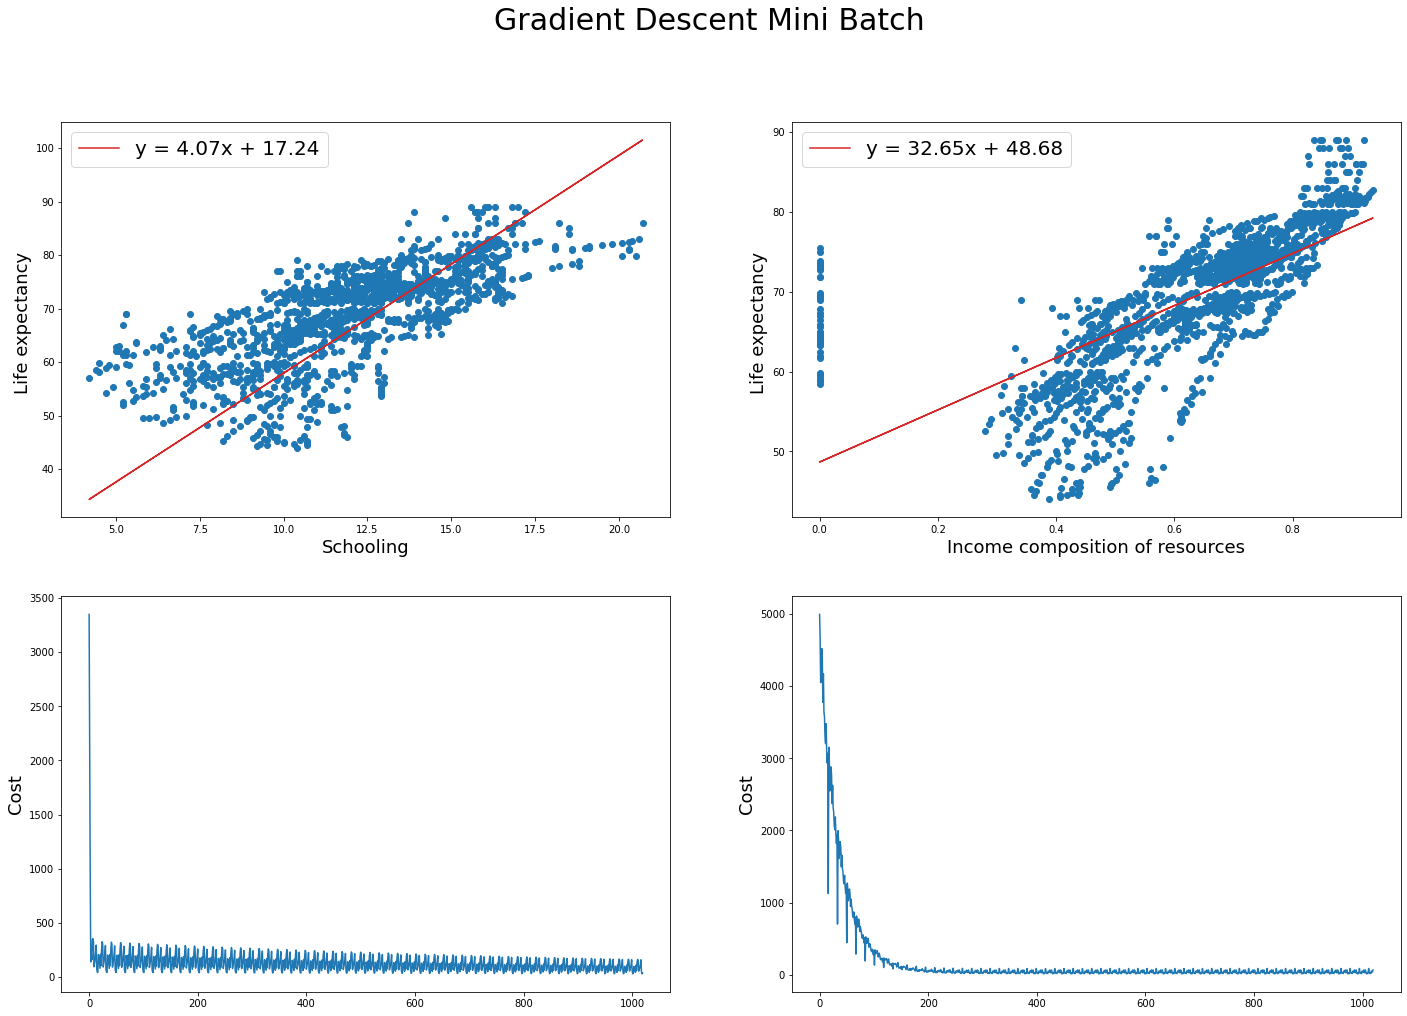

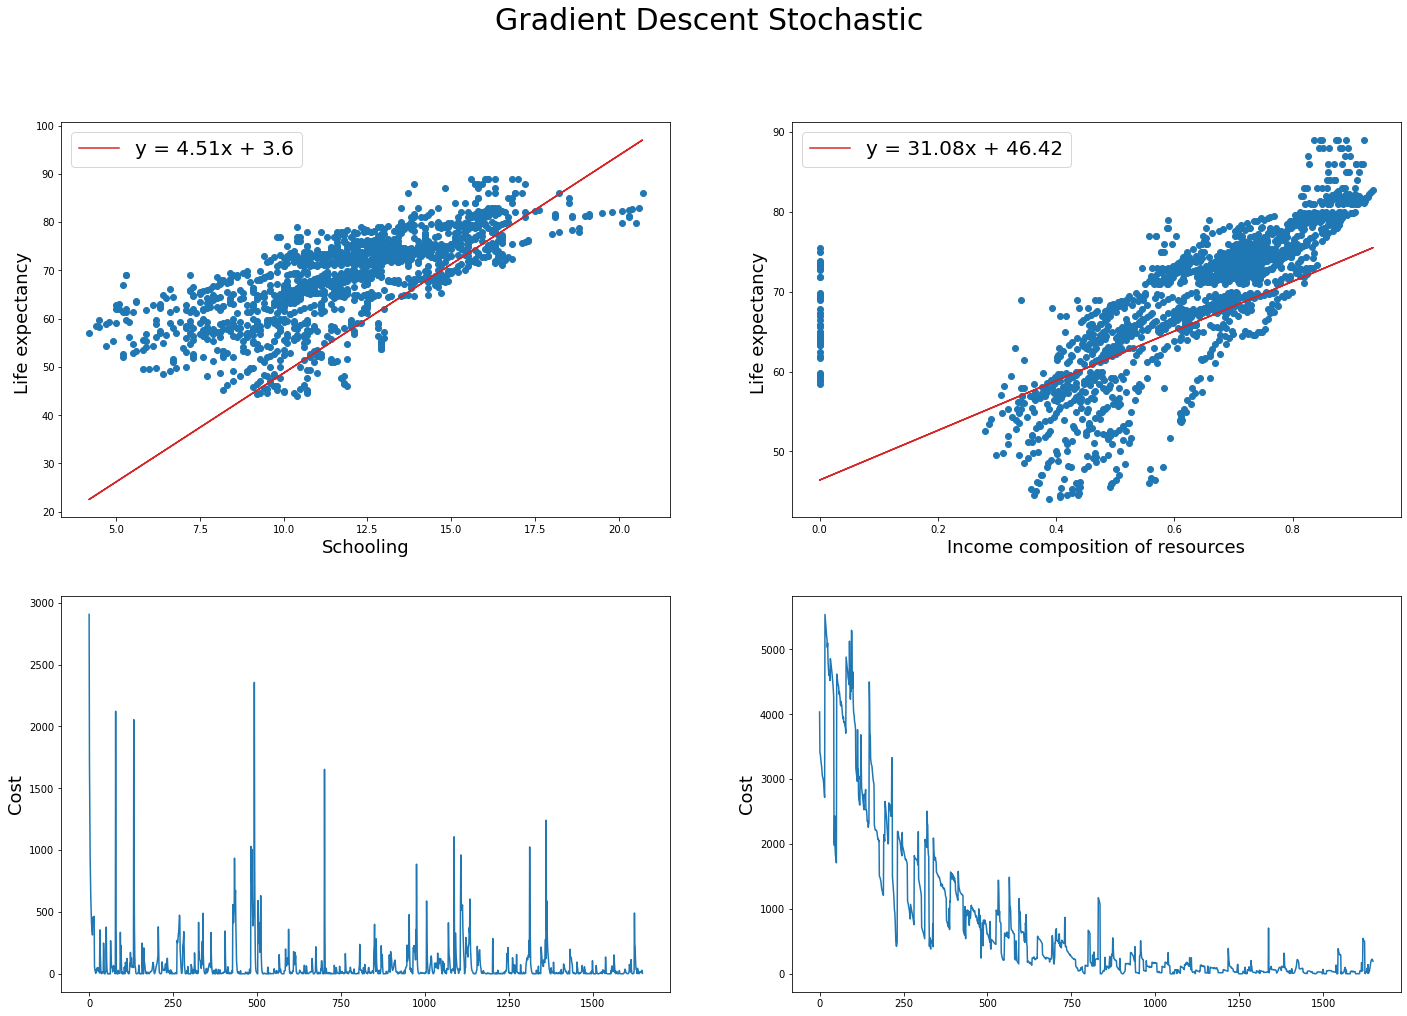

In [9]:
def plot_same_figure(axes_data, func, *args, **kwargs):
    n = len(axes_data)
    fig = plt.figure(figsize=fig_size)
    fig.suptitle(beautify_snake_case(func.__name__), fontsize=30)

    for i, axis_data in enumerate(axes_data):
        ax = fig.add_subplot(2,2,i+1)
        y_label, y = axis_data['y']
        x_label, x = axis_data['x']
        theta, costs = func(x, y, *args, **kwargs)
        y_pred = theta.T.dot(x)[0]

        ax.set_ylabel(y_label, fontsize=18)
        ax.set_xlabel(x_label, fontsize=18)
        ax.scatter(x[1], y, color ='tab:blue')
        lin, =ax.plot(x[1], y_pred, color = 'tab:red')
        label = f'y = {round(theta[1][0],2)}x + {round(theta[0][0],2)}'
        ax.legend([lin],[label], prop={'size':20})
        
        print(f'final cost: {costs[-1]:.2E}')
        cx = fig.add_subplot(2,2,i+3)
        cx.plot(costs)
        cx.set_ylabel('Cost', fontsize=18)

x_labels = ['Schooling', 'Income composition of resources']
y_label = 'Life expectancy '
fig_size = (24,16)
data = data_raw
data_size = len(data)

axes_data = [{
    'y' : (y_label, np.array([data.head(data_size)[y_label].values])),
    'x' : (x_label, to_x_data_array(data.head(data_size),x_label))
    } for x_label in x_labels]

plot_same_figure(axes_data, gradient_descent_batch,
                 epochs=1000, learning_rate = 10**-8)
plot_same_figure(axes_data, gradient_descent_mini_batch,
                 epochs=60, learning_rate = 10**-6, batch_size=100)
plot_same_figure(axes_data, gradient_descent_stochastic,
                 learning_rate = 9**-3, epochs=1)

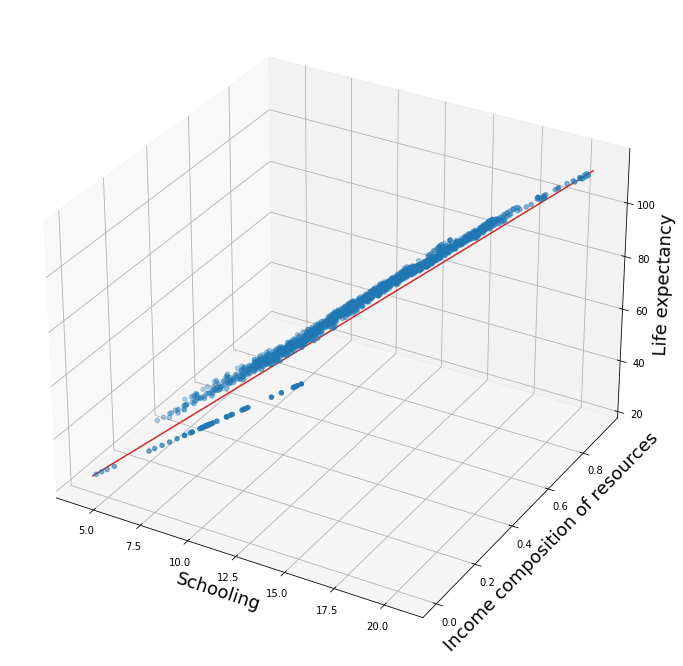

In [919]:
from mpl_toolkits.mplot3d import Axes3D
data = data_raw
data_size = len(data)
axes_data = {
    'y' :(y_label, data.head(data_size)[y_label].values),
    'x' :(x_labels, to_x_data_array(data, *x_labels))
}

def plot_multiple_regression(axes_data):
    y_label, y = axes_data['y']
    x_labels, x = axes_data['x']
    theta, losses = gradient_descent_batch(x, y, epochs=200)
    y_pred = theta.T.dot(x)[0]

    fig = plt.figure(figsize=(24,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[1], x[2], y_pred)

    axes_data['y_pred'] = y_label, y_pred
    plot_line(axes_data,theta, ax)


def plot_line(axes_data, theta, ax):
    y_label, y_pred = axes_data['y_pred']
    x_labels, x = axes_data['x']

    linx = np.array([
        np.ones(100),
        np.linspace(min(x[1]),max(x[1]),100),
        np.linspace(min(x[2]),max(x[2]),100)
    ])
    liny = theta.T.dot(linx)[0]

    ax.plot(*linx[1:],liny, color='tab:red')
    ax.set_xlabel(x_tags[0],fontsize=18)
    ax.set_ylabel(x_tags[1],fontsize=18)
    ax.set_zlabel(y_tag,fontsize=18)

plot_multiple_regression(axes_data)




0 a
1 b
